In [2]:
import numpy as np
import nibabel as nib
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import tools
from importlib import reload
import wbplot
import pandas as pd
import matplotlib.image as img 
import statsmodels.sandbox.stats.multicomp as mc

#### Basic params

In [11]:
datadir = '../../derivatives/results/analysis1/'

networkdef = np.loadtxt('../../cortex_parcel_network_assignments.txt')
# need to subtract one to make it compatible for python indices
indsort = np.loadtxt('../../cortex_community_order.txt',dtype=int) - 1 
indsort.shape = (len(indsort),1)

# network mappings for final partition set
networkmappings = {'fpn':7, 'vis1':1, 'vis2':2, 'smn':3, 'aud':8, 'lan':6, 'dan':5, 'con':4, 'dmn':9, 
                   'pmulti':10, 'none1':11, 'none2':12}
networks = networkmappings.keys()

xticks = {}
reorderednetworkaffil = networkdef[indsort]
for net in networks:
    netNum = networkmappings[net]
    netind = np.where(reorderednetworkaffil==netNum)[0]
    tick = np.max(netind)
    xticks[tick] = net

## General parameters/variables
nParcels = 360

sortednets = np.sort(list(xticks.keys()))
orderednetworks = []
for net in sortednets: orderednetworks.append(xticks[net])
    
networkpalette = ['royalblue','slateblue','paleturquoise','darkorchid','limegreen',
                  'lightseagreen','yellow','orchid','r','peru','orange','olivedrab']
networkpalette = np.asarray(networkpalette)
OrderedNetworks = ['VIS1','VIS2','SMN','CON','DAN','LAN','FPN','AUD','DMN','PMM','VMM','ORA']

# Set task ordering
unique_tasks = ['NoGo','Go','TheoryOfMind','VideoActions','VideoKnots','Math',
                'DigitJudgement','Objects','MotorImagery','FingerSimple','FingerSeq',
                'Verbal2Back','SpatialImagery','VerbGen','WordRead','Rest',
                'PermutedRules','SpatialMapEasy','SpatialMapMed','SpatialMapHard',
                'NatureMovie','AnimatedMovie','LandscapeMovie','UnpleasantScenes','PleasantScenes',
                'SadFaces','HappyFaces','Object2Back','IntervalTiming',
                'Prediction','PredictViol','PredictScram','VisualSearchEasy','VisualSearchMed','VisualSearchHard',
                'StroopIncon','StroopCon','MentalRotEasy','MentalRotMed','MentalRotHard',
                'BiologicalMotion','ScrambledMotion','RespAltEasy','RespAltMed','RespAltHard']

task_passivity = ['left','left','left','passive','passive','right',
                  'right','passive','passive','both','both',
                  'left','passive','passive','passive','passive',
                  'both','both','both','both',
                  'passive','passive','passive','left','left',
                  'right','right','right','right',
                  'left','left','left','left','left','left',
                  'both','both','right','right','right',
                  'right','right','both','both','both']

# sort tasks by passivity
unique_tasks = np.asarray(unique_tasks)
task_passivity = np.asarray(task_passivity)
unique_tasks2 = []
passivity_order = ['passive','left','right','both']
for i in passivity_order:
    ind = np.where(task_passivity==i)[0]
    unique_tasks2.extend(unique_tasks[ind])

unique_tasks = np.asarray(unique_tasks2)

# Number of trials per condition

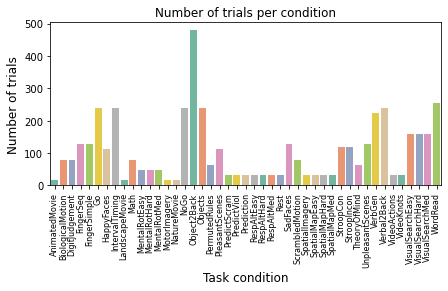

In [40]:
df = pd.read_csv(datadir + 'analysis1_numTrialsPerCond.csv')
plt.figure(figsize=(7,3))
ax = sns.barplot(x="Condition",y="Number of Trials",data=df,palette="Set2")
plt.xticks(fontsize=8,rotation=90);
plt.xlabel('Task condition',fontsize=12);
plt.ylabel('Number of trials',fontsize=12);
plt.title('Number of trials per condition',fontsize=12);

# Visualize signal, noise (task), and noise (rest) correlations and compute similarity

Signal correlation with rest noise correlation | 0.25086182331165735 | p = 0.0
Signal correlation with task noise correlation | 0.2952819791565458 | p = 0.0
Rest noise correlation with task noise correlation | 0.943077989890047 | p = 0.0


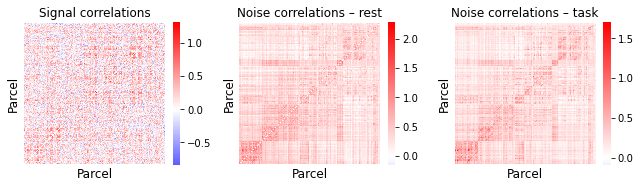

In [27]:
sigcorr = np.loadtxt(datadir + 'analysis1_signalcorr_groupaverage.txt',delimiter=',')
noisecorr_rest = np.loadtxt(datadir + 'analysis1_noisecorr_rest_groupaverage.txt',delimiter=',')
noisecorr_task = np.loadtxt(datadir + 'analysis1_noisecorr_groupconditionaverage.txt',delimiter=',')
np.fill_diagonal(sigcorr,0)
np.fill_diagonal(noisecorr,0)
np.fill_diagonal(noisecorr_task,0)

plt.figure(figsize=(9,3))
plt.subplot(131)
sig_mat_sorted = sigcorr[indsort,indsort.T]
ax = sns.heatmap(sig_mat_sorted,square=True,center=0,cmap='bwr',cbar_kws={'fraction':0.046})
ax.invert_yaxis()
plt.title('Signal correlations',fontsize=12);
plt.xticks([])
plt.yticks([])
plt.ylabel('Parcel',fontsize=12);
plt.xlabel('Parcel',fontsize=12);

plt.subplot(132)
mat_sorted = noisecorr_rest[indsort,indsort.T]
ax = sns.heatmap(mat_sorted,square=True,center=0,cmap='bwr',cbar_kws={'fraction':0.046})
ax.invert_yaxis()
plt.title('Noise correlations – rest',fontsize=12);
plt.xticks([])
plt.yticks([])
plt.ylabel('Parcel',fontsize=12);
plt.xlabel('Parcel',fontsize=12);

plt.subplot(133)
mat_sorted = noisecorr_task[indsort,indsort.T]
ax = sns.heatmap(mat_sorted,square=True,center=0,cmap='bwr',cbar_kws={'fraction':0.046})
ax.invert_yaxis()
plt.title('Noise correlations – task',fontsize=12);
plt.xticks([])
plt.yticks([])
plt.ylabel('Parcel',fontsize=12);
plt.xlabel('Parcel',fontsize=12);
plt.tight_layout()

# compute similarities
triu_ind = np.triu_indices(nParcels,k=1)
r, p = stats.pearsonr(sigcorr[triu_ind],noisecorr_rest[triu_ind])
print('Signal correlation with rest noise correlation |', r, '| p =', p)
r, p = stats.pearsonr(sigcorr[triu_ind],noisecorr_task[triu_ind])
print('Signal correlation with task noise correlation |', r, '| p =', p)
r, p = stats.pearsonr(noisecorr_rest[triu_ind],noisecorr_task[triu_ind])
print('Rest noise correlation with task noise correlation |', r, '| p =', p)



# Compute rest to task noise correlation changes (replication PLOS CB paper)

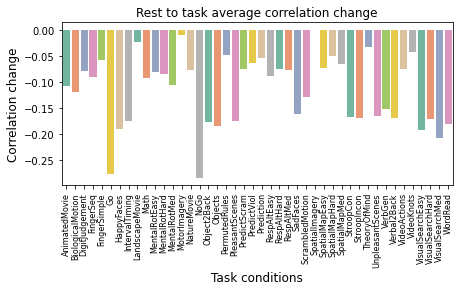

In [59]:
tmpdf = pd.read_csv(datadir + 'analysis1_AvgCorrelationChangeRestToTask.csv')
plt.figure(figsize=(7,3))
plt.title('Rest to task average correlation change', fontsize=12)
ax = sns.barplot(x="Condition",y="CorrelationChange",data=tmpdf,palette="Set2")
plt.xticks(fontsize=8,rotation=90);
plt.xlabel('Task conditions',fontsize=12);
plt.ylabel('Correlation change',fontsize=12);


# Percentage of enhanced coding correlations
#### Do positive signal correlations -> reduced noise correlations?
#### Do negative signal correlations -> increased noise correlations?

Average percentage of noise correlation decreases with positive signal correlations: 82.03647572101771
Average percentage of noise correlation increases with negative signal correlations: 18.758862251270052


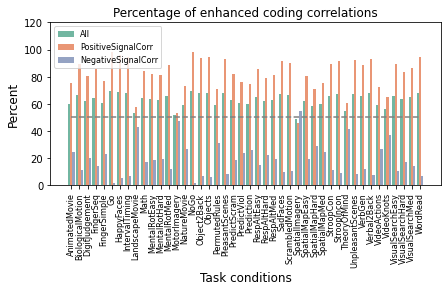

In [64]:
tmpdf = pd.read_csv(datadir + 'analysis1_SignalNoiseCorrDifferences_BasedOnPosNegSignalCorr.csv')
tmpdf.Percent = tmpdf.Percent.values*100.0
plt.figure(figsize=(7,3))
plt.title('Percentage of enhanced coding correlations', fontsize=12)
ax = sns.barplot(x="Condition",y="Percent",hue="Type",data=tmpdf,palette="Set2")
plt.plot(np.arange(len(np.unique(tmpdf.Condition.values))),np.repeat(50,len(np.unique(tmpdf.Condition.values))),'gray',linestyle='--')
plt.xticks(fontsize=8,rotation=90);
plt.xlabel('Task conditions',fontsize=12);
plt.ylabel('Percent',fontsize=12);
plt.ylim([0,120])
ax.legend(fontsize=8);
print('Average percentage of noise correlation decreases with positive signal correlations:', tmpdf.Percent[tmpdf.Type=='PositiveSignalCorr'].mean())
print('Average percentage of noise correlation increases with negative signal correlations:', tmpdf.Percent[tmpdf.Type=='NegativeSignalCorr'].mean())

# What percentage of increased noise correlations are associated with 'enhanced coding' principles
#### Do observed increased noise correlations come from negative signal correlations?

Average percentage of noise correlation decreases with positive signal correlations: 31.48845741788632


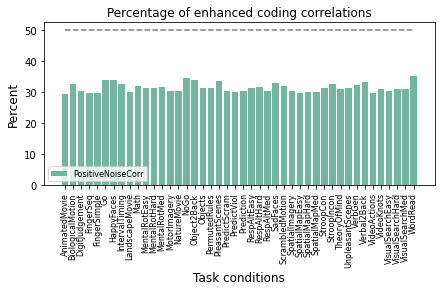

In [65]:
tmpdf = pd.read_csv(datadir + 'analysis1_SignalNoiseCorrDifferences_NoiseCorrChanges.csv')
tmpdf = tmpdf.loc[tmpdf.Type=='PositiveNoiseCorr']
tmpdf.Percent = tmpdf.Percent.values*100.0
plt.figure(figsize=(7,3))
plt.title('Percentage of enhanced coding correlations', fontsize=12)
ax = sns.barplot(x="Condition",y="Percent",hue="Type",data=tmpdf,palette="Set2")
plt.plot(np.arange(len(np.unique(tmpdf.Condition.values))),np.repeat(50,len(np.unique(tmpdf.Condition.values))),'gray',linestyle='--')
plt.xticks(fontsize=8,rotation=90);
plt.xlabel('Task conditions',fontsize=12);
plt.ylabel('Percent',fontsize=12);
# plt.ylim([0,120])
ax.legend(fontsize=8);
print('Average percentage of noise correlation decreases with positive signal correlations:', tmpdf.Percent[tmpdf.Type=='PositiveNoiseCorr'].mean())